# Keras MNIST - MLP

We'll run through MNIST using several different neural net architectures.  This notebook will be a simple, multi-layer perceptron.

In [1]:
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, SGD, Adadelta
from keras import backend as K

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Loading data as a tuple
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
print(x_train[0].max())
print(x_train[0].min())

255
0


We need to do some data prep:
- Flatten our images into 1D arrays
- Normalize the values to range between 0 and 1
- Binarize the labels

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Type converting for consistency
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train /= 255 
x_test /= 255

print(x_train[0].shape)
print(x_train[0].max())

# Binarize labels, from one column with 10 values to 
# 10 binary columns
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

(784,)
1.0


Perfect.  Now we're ready to create our model architecture.  As mentioned, this will be a fairly simple model.  This will be a `Sequential` model, that is, a normal feed-forward neural network.  We'll use two fairly small `Dense` layers (64 perceptrons wide) with _relu_ activation functions followed by two `Dropout` layers.  The architecture is kind of arbitrary -- though layers within the $2^x$ series parallelize more efficiently.  

**Dense** layers are simply fully connected layers.
**Dropout** layers drop a portion of the perceptrons to prevent overfitting.

The final layer is a `Dense` layer with the same number of perceptrons as our classes with a _softmax_ activation function.  

In [6]:
model = Sequential()

# Need to specify input shape for the first layer
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# Final Dense layer acts as the classifier
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________

Now that we have the basic model architecture created, we need to compile it.  During this compilation, we need to select which model metric we want to use, which loss function we want to learn with, and which optimizer we want to use to update the model weights and biases. 

Once we've compiled the model, we are ready to `.fit()` it.  Some common hyperparameters are `epochs` which is just the number of training cycles or updates to the model, and `batch_size` which is the number of samples used in each model step.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=10, 
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.4323 - acc: 0.8746 - val_loss: 0.1925 - val_acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.2051 - acc: 0.9388 - val_loss: 0.1425 - val_acc: 0.9566
Epoch 3/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1580 - acc: 0.9526 - val_loss: 0.1218 - val_acc: 0.9615
Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1301 - acc: 0.9604 - val_loss: 0.1025 - val_acc: 0.9680
Epoch 5/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1161 - acc: 0.9652 - val_loss: 0.0976 - val_acc: 0.9707
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1061 - acc: 0.9682 - val_loss: 0.0955 - val_acc: 0.9702
Epoch 7/10
60000/60000 [==============================] - 1s 12us/step - loss: 0

And it about 10 seconds, we've created a model that is 97% accurate.  That's pretty cool.  Let's play with some of the various hyperparameters to see if we can't get a model that is >99% accurate.  Though, we'll try to keep the model architecture the same.


## Test 1

For this first modification, we'll just train longer.  How about 100 epochs instead of 10.

In [9]:
# Increasing Epochs to 100, keeping everything else constant

# Re-instantiating the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4428 - acc: 0.8707 - val_loss: 0.2010 - val_acc: 0.9413
Epoch 2/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2119 - acc: 0.9359 - val_loss: 0.1541 - val_acc: 0.9522
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1615 - acc: 0.9513 - val_loss: 0.1224 - val_acc: 0.9633
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1351 - acc: 0.9590 - val_loss: 0.0975 - val_acc: 0.9699
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1183 - acc: 0.9643 - val_loss: 0.0983 - val_acc: 0.9704
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.1058 - acc: 0.9677 - val_loss: 0.0900 - val_acc: 0.9733
Epoch 7/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0954 - acc: 0.9708 - val_loss: 0.0863 - 

60000/60000 [==============================] - 1s 12us/step - loss: 0.0344 - acc: 0.9900 - val_loss: 0.1197 - val_acc: 0.9773
Epoch 60/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0330 - acc: 0.9906 - val_loss: 0.1237 - val_acc: 0.9786
Epoch 61/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0346 - acc: 0.9901 - val_loss: 0.1190 - val_acc: 0.9779
Epoch 62/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0323 - acc: 0.9905 - val_loss: 0.1114 - val_acc: 0.9788
Epoch 63/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0307 - acc: 0.9908 - val_loss: 0.1162 - val_acc: 0.9774
Epoch 64/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0334 - acc: 0.9906 - val_loss: 0.1203 - val_acc: 0.9785
Epoch 65/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.0312 - acc: 0.9907 - val_loss: 0.1187 - val_acc: 0.9788
Epoch 66/100
60000/60000 [==============

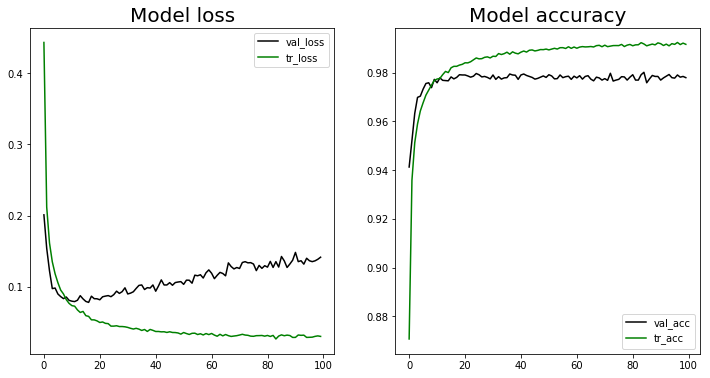

In [10]:
mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

That didn't work.  After about 10 epochs, we started overfitting, as noted by the separation of the `training_loss` and `validation_loss`.

## Test 2

Let's reduce the epochs back a bit, but increase the batch size.

In [11]:
# Epochs to 50, batch_size doubled to 256

# Re-instantiating the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 256,
                    epochs=50, 
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.5190 - acc: 0.8501 - val_loss: 0.2189 - val_acc: 0.9331
Epoch 2/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.2352 - acc: 0.9302 - val_loss: 0.1631 - val_acc: 0.9474
Epoch 3/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.1811 - acc: 0.9454 - val_loss: 0.1336 - val_acc: 0.9581
Epoch 4/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.1482 - acc: 0.9554 - val_loss: 0.1159 - val_acc: 0.9656
Epoch 5/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.1310 - acc: 0.9608 - val_loss: 0.1070 - val_acc: 0.9673
Epoch 6/50
60000/60000 [==============================] - 0s 8us/step - loss: 0.1173 - acc: 0.9644 - val_loss: 0.0996 - val_acc: 0.9685
Epoch 7/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.1065 - acc: 0.9677 - val_loss: 0.0956 - val_acc: 0.97

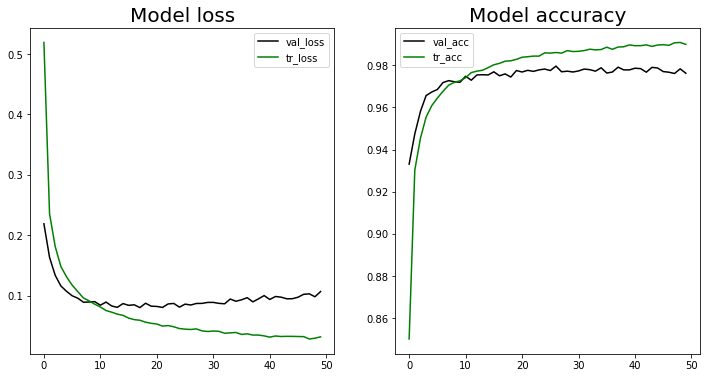

In [12]:
mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

An increassed `batch_size` significantly smoothed our training process, but didn't land us in a good spot.


# Test 3

Let's reduce the batch size to 64.

In [13]:
# Epochs still at 50, batch_size to 64

# Re-instantiating the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 64,
                    epochs=50, 
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3724 - acc: 0.8890 - val_loss: 0.1692 - val_acc: 0.9508
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1825 - acc: 0.9450 - val_loss: 0.1268 - val_acc: 0.9625
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1447 - acc: 0.9580 - val_loss: 0.1095 - val_acc: 0.9653
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1222 - acc: 0.9642 - val_loss: 0.1070 - val_acc: 0.9699
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1098 - acc: 0.9672 - val_loss: 0.1040 - val_acc: 0.9714
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1013 - acc: 0.9697 - val_loss: 0.1033 - val_acc: 0.9712
Epoch 7/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0940 - acc: 0.9721 - val_loss: 0.0954 - val_acc

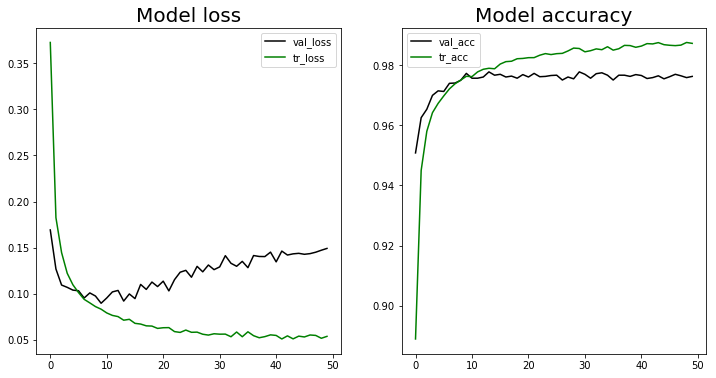

In [14]:
mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

As expected, the smaller batch size made our training process more irregular.

In [15]:
# SGD optimizer, epochs still at 50, batch_size to 128

# Re-instantiating the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=50, 
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.5955 - acc: 0.5295 - val_loss: 0.7678 - val_acc: 0.8297
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.7010 - acc: 0.7973 - val_loss: 0.4573 - val_acc: 0.8802
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5291 - acc: 0.8433 - val_loss: 0.3779 - val_acc: 0.8938
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4558 - acc: 0.8635 - val_loss: 0.3363 - val_acc: 0.9049
Epoch 5/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.4166 - acc: 0.8757 - val_loss: 0.3107 - val_acc: 0.9108
Epoch 6/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.3861 - acc: 0.8853 - val_loss: 0.2908 - val_acc: 0.9152
Epoch 7/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.3663 - acc: 0.8912 - val_loss: 0.2756 - val_acc

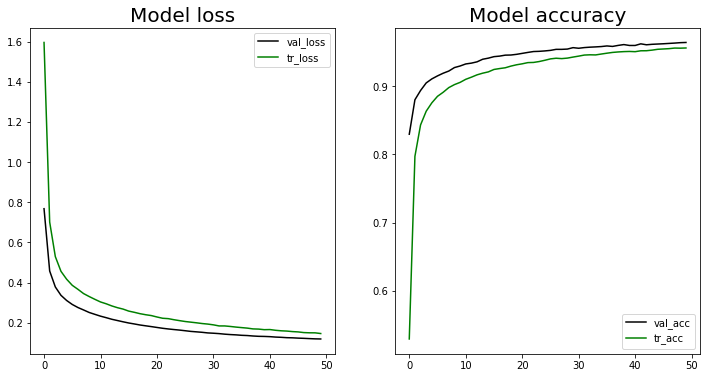

In [16]:
mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

That made a big difference!  We've got a very smooth (and slow) training process now and have not, yet, overfit the data.  


# Test 5

Let's run this again, but with a bigger batch size and more epochs.

In [17]:
# SGD optimizer, epochs still at 50, batch_size to 128

# Re-instantiating the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 256,
                    epochs=150, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 14us/step - loss: 1.9408 - acc: 0.3925 - val_loss: 1.3768 - val_acc: 0.7352
Epoch 2/150
60000/60000 [==============================] - 0s 8us/step - loss: 1.1246 - acc: 0.6980 - val_loss: 0.7463 - val_acc: 0.8311
Epoch 3/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.7762 - acc: 0.7742 - val_loss: 0.5466 - val_acc: 0.8678
Epoch 4/150
60000/60000 [==============================] - 1s 8us/step - loss: 0.6366 - acc: 0.8132 - val_loss: 0.4582 - val_acc: 0.8818
Epoch 5/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.5612 - acc: 0.8346 - val_loss: 0.4086 - val_acc: 0.8925
Epoch 6/150
60000/60000 [==============================] - 0s 7us/step - loss: 0.5126 - acc: 0.8486 - val_loss: 0.3762 - val_acc: 0.8983
Epoch 7/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.4766 - acc: 0.8597 - val_loss: 0.3524 - val_ac

60000/60000 [==============================] - 0s 8us/step - loss: 0.1852 - acc: 0.9458 - val_loss: 0.1442 - val_acc: 0.9567
Epoch 61/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1847 - acc: 0.9458 - val_loss: 0.1428 - val_acc: 0.9571
Epoch 62/150
60000/60000 [==============================] - 0s 7us/step - loss: 0.1824 - acc: 0.9460 - val_loss: 0.1417 - val_acc: 0.9585
Epoch 63/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1836 - acc: 0.9473 - val_loss: 0.1406 - val_acc: 0.9584
Epoch 64/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1794 - acc: 0.9462 - val_loss: 0.1396 - val_acc: 0.9580
Epoch 65/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1777 - acc: 0.9482 - val_loss: 0.1387 - val_acc: 0.9582
Epoch 66/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1775 - acc: 0.9476 - val_loss: 0.1377 - val_acc: 0.9586
Epoch 67/150
60000/60000 [=====================

60000/60000 [==============================] - 0s 8us/step - loss: 0.1306 - acc: 0.9613 - val_loss: 0.1061 - val_acc: 0.9675
Epoch 120/150
60000/60000 [==============================] - 0s 7us/step - loss: 0.1303 - acc: 0.9613 - val_loss: 0.1056 - val_acc: 0.9671
Epoch 121/150
60000/60000 [==============================] - 0s 7us/step - loss: 0.1311 - acc: 0.9612 - val_loss: 0.1063 - val_acc: 0.9673
Epoch 122/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1291 - acc: 0.9615 - val_loss: 0.1051 - val_acc: 0.9668
Epoch 123/150
60000/60000 [==============================] - 0s 7us/step - loss: 0.1279 - acc: 0.9627 - val_loss: 0.1048 - val_acc: 0.9674
Epoch 124/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1272 - acc: 0.9629 - val_loss: 0.1046 - val_acc: 0.9674
Epoch 125/150
60000/60000 [==============================] - 0s 8us/step - loss: 0.1271 - acc: 0.9626 - val_loss: 0.1041 - val_acc: 0.9677
Epoch 126/150
60000/60000 [==============

Test loss:  0.09698616645839066
Test accuracy:  0.9699


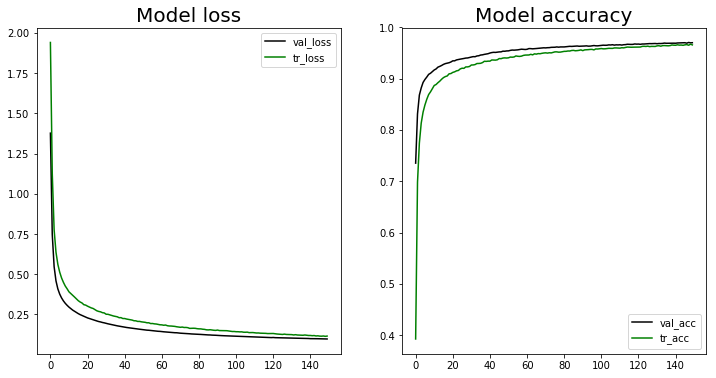

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

I think we've kind of exhusted our exploration of the hyperparameter space -- we never end in a different spot.  Let's start messing with the architecture.

## Test 6

Let's increase the layer widths.

In [19]:
# Double the layer widths, SGD optimizer, 128 batch size, 100 epochs

# Re-instantiating the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.4550 - acc: 0.5911 - val_loss: 0.6914 - val_acc: 0.8394
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.6371 - acc: 0.8178 - val_loss: 0.4348 - val_acc: 0.8837
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4865 - acc: 0.8590 - val_loss: 0.3620 - val_acc: 0.9001
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.4219 - acc: 0.8767 - val_loss: 0.3231 - val_acc: 0.9093
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3850 - acc: 0.8875 - val_loss: 0.2984 - val_acc: 0.9165
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3548 - acc: 0.8958 - val_loss: 0.2789 - val_acc: 0.9217
Epoch 7/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3333 - acc: 0.9019 - val_loss: 0.2624 - 

60000/60000 [==============================] - 1s 16us/step - loss: 0.1014 - acc: 0.9700 - val_loss: 0.0890 - val_acc: 0.9718
Epoch 60/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1000 - acc: 0.9700 - val_loss: 0.0886 - val_acc: 0.9716
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0967 - acc: 0.9709 - val_loss: 0.0879 - val_acc: 0.9716
Epoch 62/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0962 - acc: 0.9718 - val_loss: 0.0869 - val_acc: 0.9726
Epoch 63/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0969 - acc: 0.9708 - val_loss: 0.0866 - val_acc: 0.9719
Epoch 64/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0947 - acc: 0.9716 - val_loss: 0.0856 - val_acc: 0.9722
Epoch 65/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0951 - acc: 0.9713 - val_loss: 0.0854 - val_acc: 0.9722
Epoch 66/100
60000/60000 [==============

Test loss:  0.07143036284530535
Test accuracy:  0.977


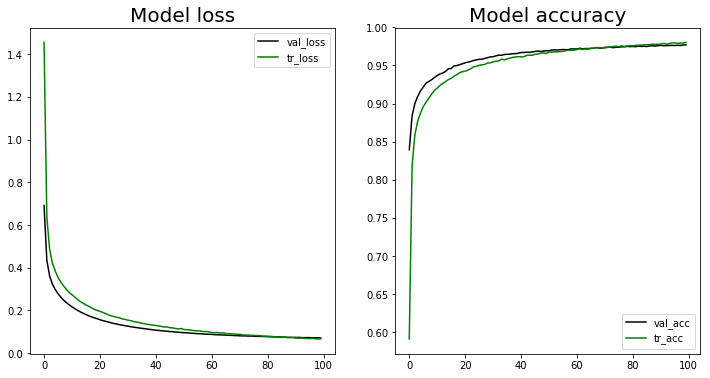

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

Well that didn't do too much.  Let's remove the `Dropout` layers because we, at least right now, don't have an overfitting issue.

# Test 7

In [21]:
# Removing Dropout layers

# Re-instantiating the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 1.2959 - acc: 0.6799 - val_loss: 0.6035 - val_acc: 0.8581
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4968 - acc: 0.8716 - val_loss: 0.3973 - val_acc: 0.8945
Epoch 3/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3849 - acc: 0.8947 - val_loss: 0.3381 - val_acc: 0.9059
Epoch 4/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3399 - acc: 0.9052 - val_loss: 0.3084 - val_acc: 0.9139
Epoch 5/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3121 - acc: 0.9125 - val_loss: 0.2878 - val_acc: 0.9198
Epoch 6/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.2917 - acc: 0.9178 - val_loss: 0.2727 - val_acc: 0.9243
Epoch 7/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.2750 - acc: 0.9216 - val_loss: 0.2574 - 

60000/60000 [==============================] - 1s 13us/step - loss: 0.0729 - acc: 0.9800 - val_loss: 0.0931 - val_acc: 0.9737
Epoch 60/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0717 - acc: 0.9803 - val_loss: 0.0910 - val_acc: 0.9730
Epoch 61/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0706 - acc: 0.9804 - val_loss: 0.0902 - val_acc: 0.9735
Epoch 62/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0694 - acc: 0.9810 - val_loss: 0.0904 - val_acc: 0.9742
Epoch 63/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0683 - acc: 0.9814 - val_loss: 0.0905 - val_acc: 0.9737
Epoch 64/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0673 - acc: 0.9817 - val_loss: 0.0888 - val_acc: 0.9728
Epoch 65/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0662 - acc: 0.9818 - val_loss: 0.0890 - val_acc: 0.9736
Epoch 66/100
60000/60000 [==============

Test loss:  0.07685499409241602
Test accuracy:  0.9757


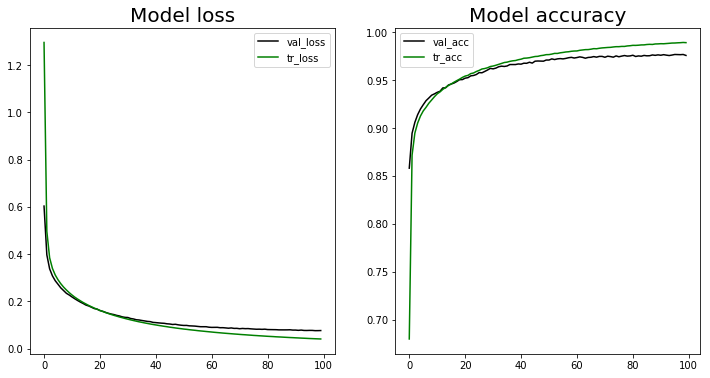

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

We still did not overfit the data.

# Test 8

Change from `relu` to `tanh` activation functions.

In [23]:
# Changing activations to `tanh`

# Re-instantiating the model
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(784,)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/step - loss: 1.0315 - acc: 0.7543 - val_loss: 0.5704 - val_acc: 0.8670
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4984 - acc: 0.8736 - val_loss: 0.4198 - val_acc: 0.8906
Epoch 3/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4065 - acc: 0.8904 - val_loss: 0.3652 - val_acc: 0.9008
Epoch 4/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3650 - acc: 0.8984 - val_loss: 0.3353 - val_acc: 0.9073
Epoch 5/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3395 - acc: 0.9047 - val_loss: 0.3156 - val_acc: 0.9107
Epoch 6/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3212 - acc: 0.9087 - val_loss: 0.3017 - val_acc: 0.9163
Epoch 7/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3070 - acc: 0.9130 - val_loss: 0.2894 - 

60000/60000 [==============================] - 1s 14us/step - loss: 0.1048 - acc: 0.9703 - val_loss: 0.1142 - val_acc: 0.9651
Epoch 60/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.1033 - acc: 0.9708 - val_loss: 0.1129 - val_acc: 0.9669
Epoch 61/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.1019 - acc: 0.9713 - val_loss: 0.1117 - val_acc: 0.9671
Epoch 62/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.1006 - acc: 0.9717 - val_loss: 0.1107 - val_acc: 0.9674
Epoch 63/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0992 - acc: 0.9721 - val_loss: 0.1092 - val_acc: 0.9669
Epoch 64/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0978 - acc: 0.9724 - val_loss: 0.1092 - val_acc: 0.9679
Epoch 65/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0965 - acc: 0.9728 - val_loss: 0.1080 - val_acc: 0.9683
Epoch 66/100
60000/60000 [==============

Test loss:  0.0864833346221596
Test accuracy:  0.974


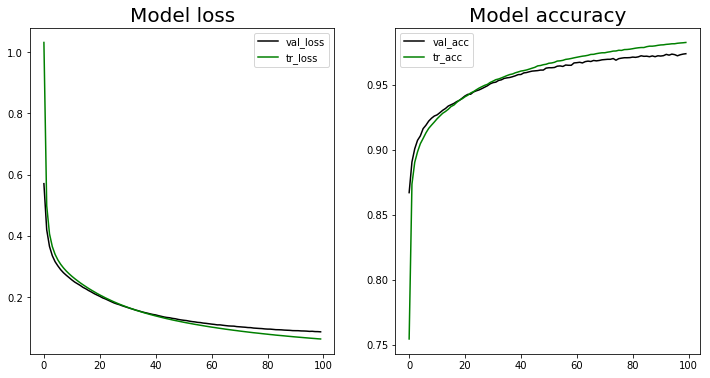

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

Ok. No real change.

## Test 9

We'll add two more layers.

In [25]:
# 4 Dense layers to the final Dense output

# Re-instantiating the model
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(784,)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.9445 - acc: 0.7688 - val_loss: 0.4799 - val_acc: 0.8786
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.4232 - acc: 0.8866 - val_loss: 0.3539 - val_acc: 0.9036
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3470 - acc: 0.9030 - val_loss: 0.3105 - val_acc: 0.9124
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3119 - acc: 0.9110 - val_loss: 0.2859 - val_acc: 0.9185
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2892 - acc: 0.9170 - val_loss: 0.2705 - val_acc: 0.9223
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2719 - acc: 0.9215 - val_loss: 0.2555 - val_acc: 0.9253
Epoch 7/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.2575 - acc: 0.9252 - val_loss: 0.2443 - 

60000/60000 [==============================] - 1s 17us/step - loss: 0.0526 - acc: 0.9856 - val_loss: 0.0804 - val_acc: 0.9749
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0514 - acc: 0.9863 - val_loss: 0.0796 - val_acc: 0.9749
Epoch 61/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0503 - acc: 0.9863 - val_loss: 0.0808 - val_acc: 0.9740
Epoch 62/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0492 - acc: 0.9865 - val_loss: 0.0801 - val_acc: 0.9748
Epoch 63/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0481 - acc: 0.9867 - val_loss: 0.0786 - val_acc: 0.9753
Epoch 64/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0469 - acc: 0.9870 - val_loss: 0.0808 - val_acc: 0.9744
Epoch 65/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0460 - acc: 0.9874 - val_loss: 0.0797 - val_acc: 0.9756
Epoch 66/100
60000/60000 [==============

Test loss:  0.07153277944757137
Test accuracy:  0.9786


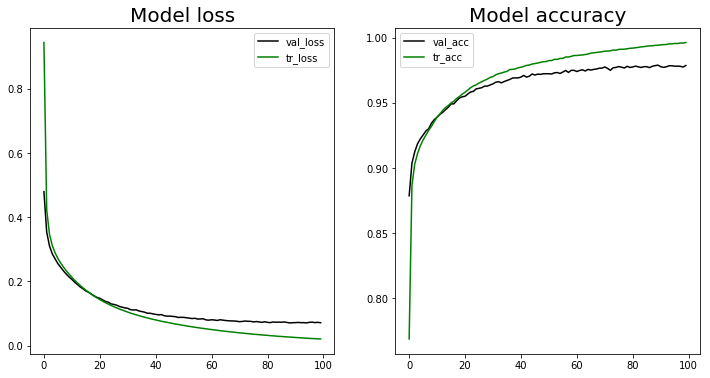

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

Adding some momentum to the SGD and putting two `Dropout` layers back in.

## Test 10

In [31]:
# Momentum in the SGD optimizer & two dropout layers

# Re-instantiating the model
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(784,)))
model.add(Dropout(.1))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(.1))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=.1),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.9203 - acc: 0.7567 - val_loss: 0.4658 - val_acc: 0.8822
Epoch 2/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.4434 - acc: 0.8794 - val_loss: 0.3496 - val_acc: 0.9039
Epoch 3/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.3666 - acc: 0.8966 - val_loss: 0.3082 - val_acc: 0.9144
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.3317 - acc: 0.9046 - val_loss: 0.2865 - val_acc: 0.9176
Epoch 5/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.3101 - acc: 0.9107 - val_loss: 0.2694 - val_acc: 0.9220
Epoch 6/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.2937 - acc: 0.9149 - val_loss: 0.2581 - val_acc: 0.9255
Epoch 7/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.2808 - acc: 0.9181 - val_loss: 0.2477 - 

60000/60000 [==============================] - 1s 22us/step - loss: 0.0926 - acc: 0.9715 - val_loss: 0.0911 - val_acc: 0.9699
Epoch 60/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0913 - acc: 0.9721 - val_loss: 0.0899 - val_acc: 0.9704
Epoch 61/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0902 - acc: 0.9724 - val_loss: 0.0880 - val_acc: 0.9711
Epoch 62/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0880 - acc: 0.9733 - val_loss: 0.0889 - val_acc: 0.9711
Epoch 63/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0882 - acc: 0.9734 - val_loss: 0.0865 - val_acc: 0.9716
Epoch 64/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0873 - acc: 0.9731 - val_loss: 0.0875 - val_acc: 0.9716
Epoch 65/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0864 - acc: 0.9739 - val_loss: 0.0866 - val_acc: 0.9718
Epoch 66/100
60000/60000 [==============

Test loss:  0.07178096141181886
Test accuracy:  0.9769


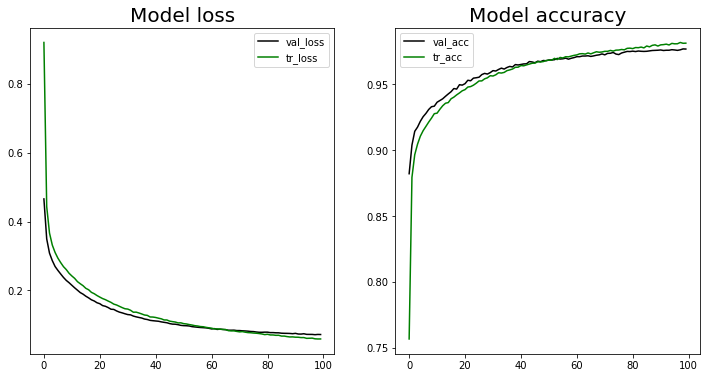

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

Nothing seems to be getting us to even 98%. 

## Test 11

Let's go hog wild.

In [33]:
# More layers, wider layers, relu activations

# Re-instantiating the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=.1),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=100, 
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 1.4158 - acc: 0.5599 - val_loss: 0.4932 - val_acc: 0.8591
Epoch 2/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.4607 - acc: 0.8629 - val_loss: 0.3209 - val_acc: 0.9074
Epoch 3/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.3442 - acc: 0.8988 - val_loss: 0.2548 - val_acc: 0.9243
Epoch 4/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2895 - acc: 0.9144 - val_loss: 0.2205 - val_acc: 0.9339
Epoch 5/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2504 - acc: 0.9267 - val_loss: 0.1915 - val_acc: 0.9446
Epoch 6/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2217 - acc: 0.9349 - val_loss: 0.1739 - val_acc: 0.9486
Epoch 7/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1996 - acc: 0.9413 - val_loss: 0.1586 - 

60000/60000 [==============================] - 3s 52us/step - loss: 0.0178 - acc: 0.9948 - val_loss: 0.0756 - val_acc: 0.9806
Epoch 60/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0188 - acc: 0.9943 - val_loss: 0.0762 - val_acc: 0.9804
Epoch 61/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0184 - acc: 0.9943 - val_loss: 0.0752 - val_acc: 0.9806
Epoch 62/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.0177 - acc: 0.9946 - val_loss: 0.0759 - val_acc: 0.9806
Epoch 63/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.0160 - acc: 0.9952 - val_loss: 0.0773 - val_acc: 0.9800
Epoch 64/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.0162 - acc: 0.9953 - val_loss: 0.0744 - val_acc: 0.9811
Epoch 65/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0157 - acc: 0.9952 - val_loss: 0.0784 - val_acc: 0.9809
Epoch 66/100
60000/60000 [==============

Test loss:  0.08362604063499902
Test accuracy:  0.9813


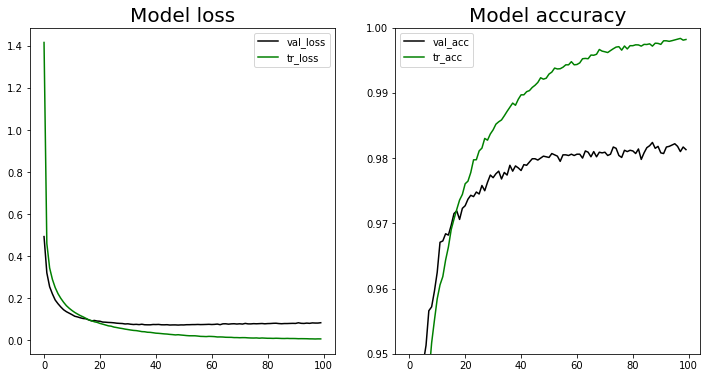

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

mlp_100e = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(mlp_100e.index, mlp_100e['val_loss'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(mlp_100e.index, mlp_100e['val_acc'], color='k')
plt.plot(mlp_100e.index, mlp_100e['tr_acc'], color='g')
plt.ylim(0.95,1)
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()

Well.  We got to 98% test accuracy.  Without finer detailed optimization, it doesn't seem like this is going to get us much farther.  In fact, reading through [this Kaggle kernel for the MNIST data](https://www.kaggle.com/c/digit-recognizer/discussion/61480) we find evidence that a plain Jane feedforward NN can't really get much higher than 98%.